![CDS 411 logo](../../img/cds-411-logo.png)

# Class 11: System dynamics models: Damped oscillator and bungee jumping I

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Model of an undamped spring

### Constants

In [2]:
sim_time = 3.0  # s
delta_t = 0.00001 # s
sim_steps = int(sim_time / delta_t)

mass = 0.2  # kg
spring_constant = 10  # N/m
gravity_acceleration = -9.81  # m/s^2
weight = mass * gravity_acceleration  # N

unweighted_length = 1.000  # m
weight_displacement = 1.962 / 10 # m
weighted_length = unweighted_length + weight_displacement  # m
init_displacement = 0.3  # m

length = weighted_length + init_displacement  # m
velocity = 0  # m/s

### Simulation history

In [3]:
trace = [[0, length, 0]]

### Algorithm

In [4]:
for step_index in range(1, sim_steps + 1):
    restoring_spring_force = spring_constant * (length - unweighted_length)
    total_force = restoring_spring_force + weight
    acceleration = total_force / mass

    length += -velocity * delta_t
    velocity += delta_t * acceleration

    trace.append([step_index, length, velocity])

### Convert results to data frame

In [5]:
simulation_df = pd.DataFrame({
    "time": [x[0] * delta_t for x in trace],
    "length": [x[1] for x in trace],
    "velocity": [x[2] for x in trace],
})

### Visualization

In [6]:
figwidth = 5  # inches
figheight = 0.618 * figwidth  # golden ratio
figsize = (figwidth, 1.5 * figheight)

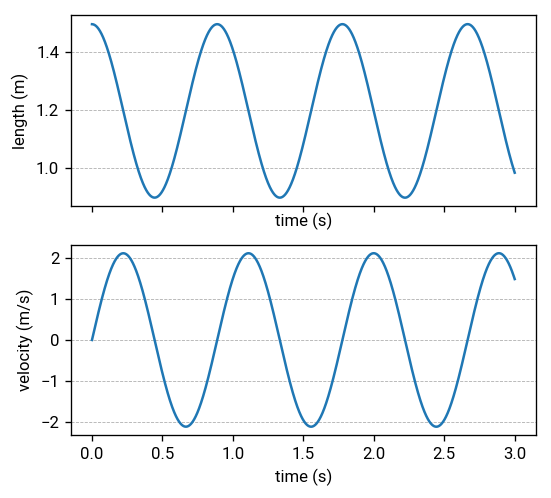

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=figsize, dpi=120, sharex=True)
ax[0].plot(simulation_df["time"], simulation_df["length"], "-")
ax[1].plot(simulation_df["time"], simulation_df["velocity"], "-")
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("length (m)")
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("velocity (m/s)");